In [2]:
### 《遗漏值预测号》 ###

## STEP0：读取数据，从有遗漏值的数据里
import pandas as pd

# 超参数
COLS_QiHao = '期号'
COLS_BALL_1 = '开奖号码1'
COLS_BALL_2 = '开奖号码2'
COLS_BALL_3 = '开奖号码3'
COLS_BALL_1_YiLou = '1号球遗漏'
COLS_BALL_2_YiLou = '2号球遗漏'
COLS_BALL_3_YiLou = '3号球遗漏'
COLS_BALL_1_YiLouALL = '1号球全局遗漏'
COLS_BALL_2_YiLouALL = '2号球全局遗漏'
COLS_BALL_3_YiLouALL = '3号球全局遗漏'
COLS_ALL = [COLS_QiHao, '开奖日期', '开奖号码',
             COLS_BALL_1, COLS_BALL_2, COLS_BALL_3, 
             COLS_BALL_1_YiLou, COLS_BALL_2_YiLou, COLS_BALL_3_YiLou,
             COLS_BALL_1_YiLouALL, COLS_BALL_2_YiLouALL, COLS_BALL_3_YiLouALL]
file_path = 'Data\福彩3D历史开奖_间隔.csv'

df = pd.read_csv(file_path,usecols=COLS_ALL, encoding='GBK')
print('读取cvs文件: '+file_path)
print(df)


读取cvs文件: Data\福彩3D历史开奖_间隔.csv
           期号           开奖日期  开奖号码1  开奖号码2  开奖号码3  开奖号码  1号球遗漏  2号球遗漏  3号球遗漏  \
0     2024144  2024-06-02(日)      8      1      6   816      1      1      2   
1     2024143  2024-06-01(六)      9      5      5   955      4      1      4   
2     2024142  2024-05-31(五)      8      1      3   813     25     14     13   
3     2024141  2024-05-30(四)      2      5      6   256      4      2      0   
4     2024140  2024-05-29(三)      5      3      6   536     11      4      9   
...       ...            ...    ...    ...    ...   ...    ...    ...    ...   
3925  2013038  2013-02-07(四)      6      4      0   640      1     -1     -1   
3926  2013037  2013-02-06(三)      3      6      4   364     -1     -1     -1   
3927  2013036  2013-02-05(二)      6      5      8   658     -1     -1     -1   
3928  2013033  2013-02-02(六)      2      7      7   277     -1     -1     -1   
3929  2013030  2013-01-30(三)      7      3      2   732     -1     -1     -1   

      1号球

2024-09-04 14:54:53.927 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=12.863731)


[10, 6, 0, 3, 0, 1, 8, 3, 0, 0, 0, 3, 1, 1, 0, 1, 2, 3, 1, 2, 1, 6, 2, 4, 3, 2, 0, 0, 10, 3, 6, 1, 6, 5, 6, 1, 9, 0, 2, 1, 2, 0, 1, 0, 0, 2, 6, 0, 1, 6, 7, 1, 1, 3, 0, 0, 4, 0, 5, 5, 5, 5, 0, 5, 0, 0, 1, 1, 0, 6, 4, 2, 1, 3, 6, 4, 1, 1, 2, 0, 7, 1, 2, 0, 0, 9, 2, 2, 2, 11]


2024-09-04 14:54:54.066 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=11.928397)
2024-09-04 14:54:54.090 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=11.891262)
2024-09-04 14:54:54.213 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewnorm distribution with error=11.492316)
2024-09-04 14:54:54.228 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=9.772109)
2024-09-04 14:54:54.231 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=10.683048)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,9.772109,617.560774,627.560013,inf,0.255556,0.000011
gamma,10.683048,756.180078,763.679507,inf,0.255556,0.000011
skewnorm,11.492316,593.909497,601.408926,inf,0.261130,0.000007
t,11.891262,649.524433,657.023862,inf,0.179059,0.005376
norm,11.928397,628.490603,633.490222,inf,0.206517,0.000763


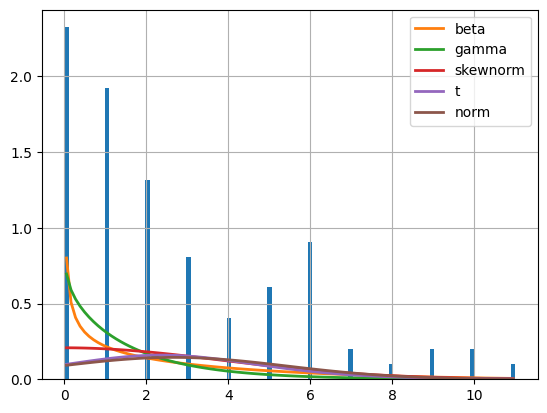

In [63]:
## STEP1：计算一段时间内的遗漏值列表。（如N期内
def get_values_by_id_and_range(df, id, n):
    # param: id     期号
    # param: n      期号开始往后查几期
    cols = [COLS_BALL_1_YiLouALL, COLS_BALL_2_YiLouALL, COLS_BALL_3_YiLouALL]  # 指定要返回的列
    # 确保编号列是字符串类型，以便可以匹配编号
    df[COLS_QiHao] = df[COLS_QiHao].astype(str)
    # 找到匹配的行的索引
    matched_index = df[df[COLS_QiHao] == id].index[0]
    # 计算要返回的行的结束索引
    end_index = matched_index + n
    # 如果结束索引超出了DataFrame的范围，调整为DataFrame的最后一行
    end_index = min(end_index, len(df))
    # 返回从匹配行开始的n行数据
    subset = df.iloc[matched_index:end_index][cols]
    # 将DataFrame的指定列转换为列表，并展开成一维数组
    return [item for sublist in subset.values.tolist() for item in sublist]


# 测试函数
id_QiHao = '2024097'
n = 30  # 想要返回的行数
values_list = get_values_by_id_and_range(df, id_QiHao, n)
print(values_list)

import numpy as np
import matplotlib.pyplot as plt
# 计算均值、标准差、中位数
mean = np.mean(values_list)
std = np.std(values_list)
median = np.median(values_list)

# 使用fitter库拟合多种分布
from fitter import Fitter
f = Fitter(values_list, distributions=['norm', 'skewnorm', 't', 'gamma', 'beta', 'lognorm'])
f.fit()
f.summary() #打印结果


In [76]:
## STEP2：统计他们分别出现多少次？
from collections import Counter
from scipy.optimize import curve_fit


# 假设你的数组是这样的
id_QiHao = '2024144'
n = 3000  # 想要返回的行数
array = get_values_by_id_and_range(df, id_QiHao, n)

# 使用Counter来统计每个数字出现的次数
count = Counter(array)
print(count)


Counter({0: 2479, 1: 1703, 2: 1302, 3: 925, 4: 729, 5: 478, 6: 397, 7: 275, 8: 194, 9: 157, 10: 99, 11: 75, 12: 52, 13: 42, 14: 31, 15: 19, 17: 13, 19: 8, 18: 7, 16: 5, 22: 3, 20: 2, 28: 1, 23: 1, 24: 1, 21: 1, 26: 1})


sum values: 9000
sorted_values_array: [2479, 1703, 1302, 925, 729, 478, 397, 275, 194, 157, 99, 75, 52, 42, 31, 19, 13, 8, 7, 5, 3, 2, 1, 1, 1, 1, 1]
proability_array: [0.27544444444444444, 0.18922222222222224, 0.14466666666666667, 0.10277777777777777, 0.081, 0.05311111111111111, 0.04411111111111111, 0.030555555555555555, 0.021555555555555557, 0.017444444444444443, 0.011, 0.008333333333333333, 0.0057777777777777775, 0.004666666666666667, 0.0034444444444444444, 0.002111111111111111, 0.0014444444444444444, 0.0008888888888888889, 0.0007777777777777777, 0.0005555555555555556, 0.0003333333333333333, 0.00022222222222222223, 0.00011111111111111112, 0.00011111111111111112, 0.00011111111111111112, 0.00011111111111111112, 0.00011111111111111112]


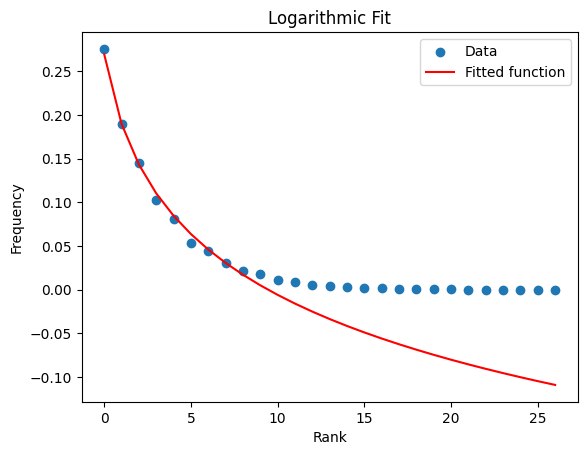

拟合参数: a = -0.11473583083276157, b = 0.26929062147015176


In [80]:
## STEP3：拟合前10高频数字出现的概率

# 获取字典中的所有值并转换成列表，形成一个新的数组
values_array = list(count.values())
total_sum = sum(values_array)
print(f"sum values: {total_sum}")

sorted_values_array = sorted(values_array, reverse=True)
print(f"sorted_values_array: {sorted_values_array}")

# 创建新的概率数组proability_array，其中每个元素是sorted_values_array中对应元素除以300
proability_array = [x / total_sum for x in sorted_values_array]
print(f"proability_array: {proability_array}")

# 将sorted_values_array的索引作为x_data
x = np.arange(len(proability_array))

# 定义对数函数模型
def log_func(x, a, b):
    return a * np.log(x+1) + b   # 加1是因为索引从0开始，而对数函数的定义域是正实数

# 拟合数据
params, params_covariance = curve_fit(log_func, x[:10], proability_array[:10])

# 绘制数据点和拟合曲线
plt.scatter(x, proability_array, label='Data')
plt.plot(x, log_func(x, *params), label='Fitted function', color='red')
plt.legend()
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Logarithmic Fit')
plt.show()

# 打印拟合参数
print(f"拟合参数: a = {params[0]}, b = {params[1]}")

In [87]:
x = 4
def get_prob(x):
    a = params[0]
    b = params[1]
    return a * np.log(x+1) + b 
print(get_prob(x))

0.08463042541327992
